In [28]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from sklearn import ensemble
%matplotlib inline
from collections import Counter
import sklearn.cross_validation
import math

In [3]:
ls

Memoizer.ipynb            Untitled.ipynb            data_sci_snippet.csv.zip
Opendoor.ipynb            Wikipedia n-grams.ipynb


In [4]:
filename = "data_sci_snippet.csv.zip"
zf = zipfile.ZipFile(filename, 'r')
print zf.namelist()

['data_sci_snippet.csv']


In [127]:
data = pd.read_csv(zf.open('data_sci_snippet.csv'))

# Convert categorical variables to floats for modeling
data['PoolFloat'] = pd.Series(data['Pool'], dtype ='category').cat.rename_categories(range(len(Counter(data['Pool']))))
data['ListingStatusFloat'] = pd.Series(data['ListingStatus'], dtype ='category').cat.rename_categories(range(len(Counter(data['ListingStatus']))))
data['DwellingTypeFloat'] = pd.Series(data['DwellingType'], dtype ='category').cat.rename_categories(range(len(Counter(data['DwellingType']))))

# Remove Outliers
data = data[(data['ClosePrice'] != 1)]
data = data[(data['ListPrice'] <= 7000000)]

print data.shape
data[:5]

(57237, 18)


,ListingId,LivingArea,NumBedrooms,NumBaths,Pool,ExteriorStories,ListDate,ListPrice,GeoLat,GeoLon,PublicRemarks,CloseDate,ClosePrice,ListingStatus,DwellingType,PoolFloat,ListingStatusFloat,DwellingTypeFloat
0,5077399,3054,4,2.5,Private,1,2014-03-04,675000,33.593239,-111.961056,This property OUTSTANDING offers outdoor livin...,NaN,NaN,Cancelled,Single Family - Detached,3,1,6
1,5077408,2230,4,2.0,Private,1,2014-03-01,475000,33.650984,-111.963151,Very special home in popular Arabian Views fee...,2014-06-24,460000,Closed,Single Family - Detached,3,2,6
2,5077486,1601,3,2.0,Private,1,2014-03-01,279900,33.692122,-112.038019,Welcome home to a beautiful remodeled. Single ...,2014-07-15,279900,Closed,Single Family - Detached,3,2,6
3,5077487,2440,4,2.5,None,2,2014-03-01,229900,33.647270,-112.251490,"NO HOA!! MOVE-IN READY!! Location, Condition ...",2014-05-28,228000,Closed,Single Family - Detached,2,2,6
4,5077489,3980,5,3.0,None,1,2014-03-01,385250,33.389139,-111.712757,Price reduced to under $100 per square foot! F...,2014-08-20,385250,Closed,Single Family - Detached,2,2,6


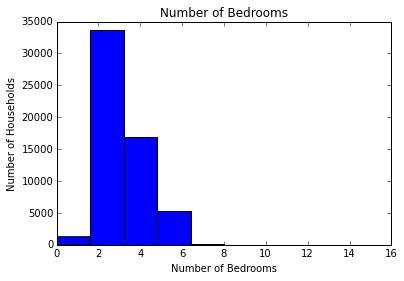

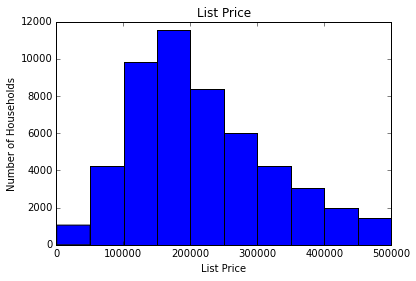

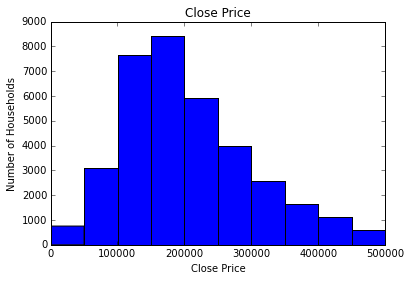

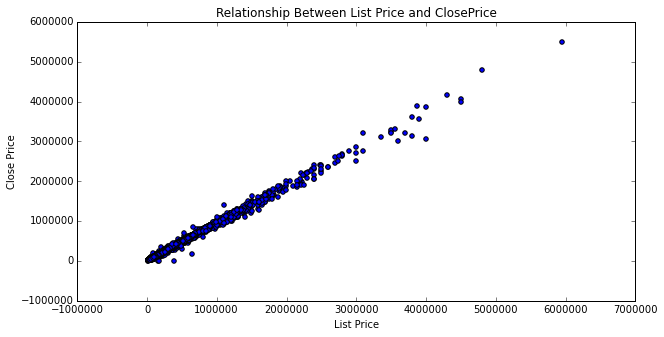

In [128]:
# Visualize Important Variables

plt.hist(data['NumBedrooms'])
plt.title('Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Households')
plt.show()


for_price_visualization = data[(data['ListPrice'] < 500000)]
plt.hist(np.array(for_price_visualization['ListPrice']))
plt.title('List Price')
plt.xlabel('List Price')
plt.ylabel('Number of Households')
plt.show()

for_close_price_visualization = data[(data['ClosePrice'] < 500000)]
plt.hist(np.array(for_close_price_visualization['ClosePrice'].dropna()))
plt.title('Close Price')
plt.xlabel('Close Price')
plt.ylabel('Number of Households')
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(data['ListPrice'], data['ClosePrice'])
plt.title('Relationship Between List Price and ClosePrice')
plt.xlabel('List Price')
plt.ylabel('Close Price')
plt.show()

In [129]:
# Look at linear relationship strength
data.corr()

,ListingId,LivingArea,NumBedrooms,NumBaths,ExteriorStories,ListPrice,GeoLat,GeoLon,ClosePrice
ListingId,1.000000,-0.020191,0.005310,-0.008613,-0.003899,-0.022915,-0.003010,-0.003203,-0.029109
LivingArea,-0.020191,1.000000,0.684533,0.121022,0.078552,0.732399,0.038962,0.021504,0.731471
NumBedrooms,0.005310,0.684533,1.000000,0.093270,0.016524,0.342287,-0.081432,-0.001445,0.360630
NumBaths,-0.008613,0.121022,0.093270,1.000000,0.018845,0.095709,0.008440,0.002334,0.067489
ExteriorStories,-0.003899,0.078552,0.016524,0.018845,1.000000,0.034321,0.002526,0.014489,0.022120
ListPrice,-0.022915,0.732399,0.342287,0.095709,0.034321,1.000000,0.137890,0.070848,0.997483
GeoLat,-0.003010,0.038962,-0.081432,0.008440,0.002526,0.137890,1.000000,-0.269421,0.132558
GeoLon,-0.003203,0.021504,-0.001445,0.002334,0.014489,0.070848,-0.269421,1.000000,0.097644
ClosePrice,-0.029109,0.731471,0.360630,0.067489,0.022120,0.997483,0.132558,0.097644,1.000000


In [131]:
without_na = data.dropna()
print without_na.shape

(37506, 18)


In [154]:
# Split Training and Testing Data
x = without_na.drop(['Pool', 'ListDate', 'PublicRemarks', 'ClosePrice', 'CloseDate', 'ListingStatus', 'DwellingType'], axis=1)
y = without_na['ClosePrice']


x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(
    x, y, test_size=0.20, random_state=42)

print x_train.shape
print x_test.shape
print y_train.shape
print y_test.shape

(30004, 11)
(7502, 11)
(30004,)
(7502,)


In [155]:
clf = ensemble.RandomForestRegressor(n_estimators = 1000)
clf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0)

In [156]:
predictions = clf.predict(x_test)

In [157]:
# Root Mean Squared Error
def RMSE(predictions, actual):
    squared_error = (predictions - actual)**2
    MSE = squared_error.mean()
    RMSE = math.sqrt(MSE)
    return RMSE

In [158]:
print RMSE(y_test, predictions)

15692.8617892


In [159]:
# Mean Absolute Error
def MAE(predictions, actual):
    MAE = (abs(predictions-y_test).mean())
    return MAE

In [160]:
MAE(predictions, y_test)

6671.4621245001335

In [161]:
1-((abs(predictions-y_test).mean())/y_test.mean())

0.97243152817159828

In [162]:
# Cross Validated Model Evaluation
forest = sklearn.ensemble.RandomForestRegressor(n_estimators=10)
scores = sklearn.cross_validation.cross_val_score(forest, x, y, cv=10)
print np.mean(scores), np.std(scores)

0.993436958804 0.001382516341


In [163]:
R2 = pd.Series(predictions).corr(pd.Series(y_test))**2
R2

0.9939275965551434

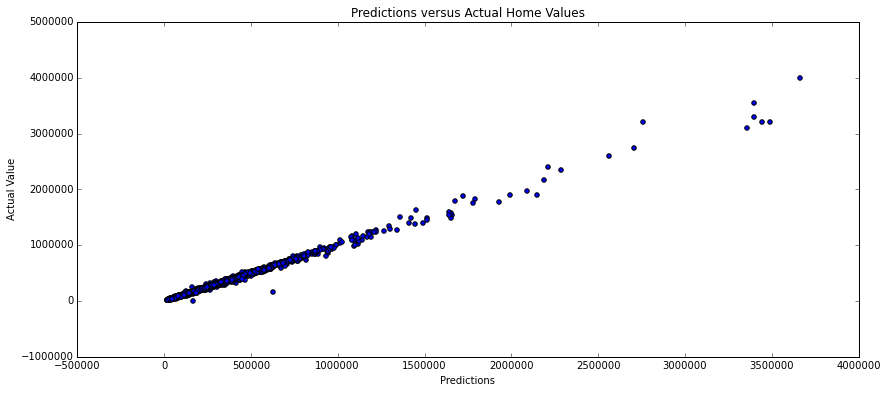

In [164]:
# Visualize Predictions

plt.figure(figsize = (14, 6))
plt.scatter(predictions, y_test)
plt.title('Predictions versus Actual Home Values')
plt.xlabel('Predictions')
plt.ylabel('Actual Value')

In [165]:
# Split Training and Testing Data, This Time Without List Price
x = without_na.drop(['Pool', 'ListDate', 'ListPrice', 'PublicRemarks', 'ClosePrice', 'CloseDate', 'ListingStatus', 'DwellingType'], axis=1)
y = without_na['ClosePrice']


x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(
    x, y, test_size=0.20, random_state=42)

print x_train.shape
print x_test.shape
print y_train.shape
print y_test.shape

(30004, 10)
(7502, 10)
(30004,)
(7502,)


In [166]:
clf = ensemble.RandomForestRegressor(n_estimators = 1000)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

In [167]:
# Root Mean Squared Error
def RMSE(predictions, actual):
    squared_error = (predictions - actual)**2
    MSE = squared_error.mean()
    RMSE = math.sqrt(MSE)
    return RMSE
print RMSE(y_test, predictions)

76934.4561508


In [168]:
# Mean Absolute Error
def MAE(predictions, actual):
    MAE = (abs(predictions-y_test).mean())
    return MAE
MAE(predictions, y_test)

32920.21953745668

In [169]:
1-((abs(predictions-y_test).mean())/y_test.mean())

0.86396383162091694

In [170]:
# Cross Validated Model Evaluation Without List Price
forest = sklearn.ensemble.RandomForestRegressor(n_estimators=10)
scores = sklearn.cross_validation.cross_val_score(forest, x, y, cv=10)
print np.mean(scores), np.std(scores)

0.854112229992 0.0118613755148


In [171]:
R2 = pd.Series(predictions).corr(pd.Series(y_test))**2
R2

0.85768102505775146

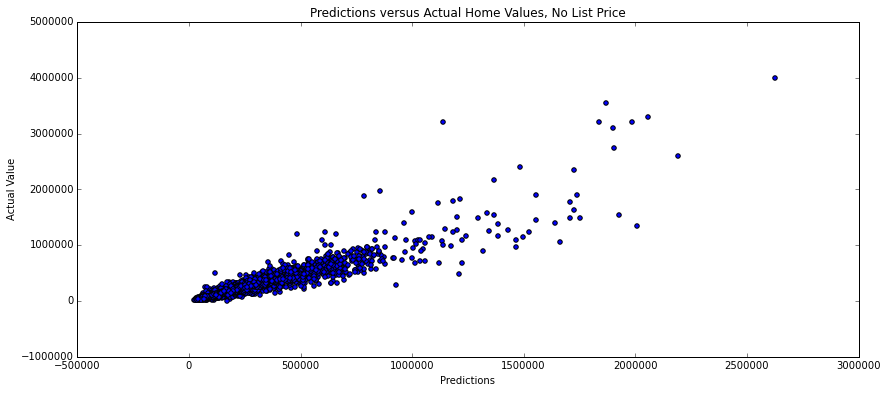

In [172]:
# Visualize Predictions

plt.figure(figsize = (14, 6))
plt.scatter(predictions, y_test)
plt.title('Predictions versus Actual Home Values, No List Price')
plt.xlabel('Predictions')
plt.ylabel('Actual Value')